In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
#import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv(r'201809-201903房貸進件(A)卡_原始檔案.CSV', index_col=0).drop(index='案件編號')
b=pd.read_csv(r'201904-201906房貸進件(A)卡_原始檔案.csv', index_col=0).drop(index='案件編號')
c=pd.read_csv(r'201907-201909房貸進件(A)卡_原始檔案.csv', index_col=0).drop(index='案件編號')
d=pd.concat([a,b],axis=0)
d=pd.concat([d,c],axis=0)

print(d.shape,a.shape,b.shape,c.shape)
print(d.dtypes)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 0: invalid start byte

In [198]:
d['CreateDate']=d['CreateDate'].astype('int32')
d['DataDate']=d['DataDate'].astype('int32')
d['LoanWay']=d['LoanWay'].astype('int32')

d['OValue01']=d['OValue01'].astype('int32')
d['OValue02']=d['OValue02'].fillna(0).astype('int32')
d['OValue03']=d['OValue03'].astype(str)
d['OValue04']=d['OValue04'].astype('float32')
d['OValue05']=d['OValue05'].astype('float32').astype('int32')
d['OValue06']=d['OValue06'].fillna(0).astype('int32')
d['OValue07']=d['OValue07'].astype('int32')
d['OValue08']=d['OValue08'].astype('int32')
d['OValue09']=d['OValue09'].astype('float32')
d['OValue10']=d['OValue10'].astype('float32')

d['RawSeq']=d['RawSeq'].astype('int32')
d['Score']=d['Score'].astype('float32').astype('int32')
d['RankNo']=d['RankNo'].astype('int32')
d['PD']=d['PD'].astype('float32')
d['Status']=d['Status'].astype('int32')
#d['LoanCloseDate']=d['LoanCloseDate'].astype('int32')
d['ApplyAmount']=d['ApplyAmount'].astype('float32').astype('int32')
d['RejectReason']=d['RejectReason'].fillna(0).astype(str)
d['J10Score']=d['J10Score'].fillna(0).astype('int32')
#d['AprvNo']=d['AprvNo'].astype('int32')
d['EstimateAmount']=d['EstimateAmount'].astype('int32')
#print(d.dtypes)

In [200]:
d.drop(["AprvNo","CustNo"], axis = 1, inplace = True)
#d.drop("CustNo", axis = 1, inplace = True)
d.shape

(1348, 26)

In [163]:
corrmat =d.corr()
corrmat

,CreateDate,DataDate,LoanWay,OValue01,OValue02,OValue04,OValue05,OValue06,OValue07,OValue08,OValue09,OValue10,RawSeq,Score,RankNo,PD,Status,ApplyAmount,J10Score,EstimateAmount
CreateDate,1.000000,0.964307,0.006682,-0.007714,0.020410,-0.008741,-0.012904,0.007858,-0.067080,-0.032992,-0.042312,-0.012173,0.881153,0.053269,-0.041937,-0.027354,NaN,-0.009327,-0.004939,0.041383
DataDate,0.964307,1.000000,-0.003693,0.009331,0.014928,-0.008018,-0.001407,-0.000801,-0.062825,-0.038522,-0.032836,-0.003668,0.856141,0.055517,-0.045746,-0.033067,NaN,-0.000156,-0.007764,0.040378
LoanWay,0.006682,-0.003693,1.000000,-0.083158,0.017311,-0.023343,0.066773,-0.104912,0.162231,0.175204,-0.101217,-0.059402,0.007169,-0.035310,0.037526,0.037793,NaN,-0.356743,0.077751,-0.016917
OValue01,-0.007714,0.009331,-0.083158,1.000000,0.005319,0.190994,0.211272,0.119798,0.075778,-0.471310,0.171248,0.167864,0.012820,0.590301,-0.584658,-0.280560,NaN,0.181425,0.074828,0.240359
OValue02,0.020410,0.014928,0.017311,0.005319,1.000000,-0.067484,-0.098746,0.033760,-0.063436,-0.098748,0.062368,0.071872,0.031097,-0.068820,0.063404,0.059906,NaN,0.090866,-0.065730,0.152002
OValue04,-0.008741,-0.008018,-0.023343,0.190994,-0.067484,1.000000,0.339507,0.042394,0.121237,-0.053618,0.092257,0.065632,-0.027510,0.246130,-0.238804,-0.193462,NaN,0.072387,0.460583,0.095968
OValue05,-0.012904,-0.001407,0.066773,0.211272,-0.098746,0.339507,1.000000,0.018381,0.110832,0.132894,0.054465,0.272766,-0.016218,0.314295,-0.293881,-0.162805,NaN,0.173098,0.271619,0.311022
OValue06,0.007858,-0.000801,-0.104912,0.119798,0.033760,0.042394,0.018381,1.000000,0.042791,-0.114106,0.150067,0.041388,0.026318,0.144034,-0.151447,-0.080379,NaN,0.132183,-0.002605,0.058596
OValue07,-0.067080,-0.062825,0.162231,0.075778,-0.063436,0.121237,0.110832,0.042791,1.000000,0.033125,0.150089,-0.004851,-0.067538,-0.075330,0.072651,0.096737,NaN,-0.080320,0.091323,0.093075
OValue08,-0.032992,-0.038522,0.175204,-0.471310,-0.098748,-0.053618,0.132894,-0.114106,0.033125,1.000000,-0.186403,0.140446,-0.028331,-0.076930,0.092360,0.045307,NaN,0.015682,0.069842,0.038610


In [ ]:
#sns.heatmap(d[cols].corr(),cmap='RdPu',annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)

In [209]:
y_train= np.log(d['PD'].values+1)
y_train
train_df=pd.get_dummies(d)
print(d.shape,train_df.shape)

(1348, 26) (1348, 376)


In [210]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y_train, test_size=0.33, random_state=1)

In [171]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    #model.add(Dropout(0.9))
    model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.9))
    #model.add(Dense(384, activation='relu'))
    
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics=['mean_absolute_error'])
    return model

In [172]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 278,017
Trainable params: 278,017
Non-trainable params: 0
_________________________________________________________________


In [211]:
model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test loss:', acc)

Train on 903 samples, validate on 445 samples
Epoch 1/100
903/903 [==============================] - 0s 531us/step - loss: 1635987001799.8669 - mean_absolute_error: 955672.0000 - val_loss: 8347072753.6180 - val_mean_absolute_error: 87744.8125
Epoch 2/100
903/903 [==============================] - 0s 288us/step - loss: 24892533099.4463 - mean_absolute_error: 121821.1484 - val_loss: 2937608889.2404 - val_mean_absolute_error: 48563.2930
Epoch 3/100
903/903 [==============================] - 0s 291us/step - loss: 1045137717.2270 - mean_absolute_error: 23865.8125 - val_loss: 486030365.2674 - val_mean_absolute_error: 13419.5928
Epoch 4/100
903/903 [==============================] - 0s 286us/step - loss: 235720076.5360 - mean_absolute_error: 9938.9580 - val_loss: 165253997.7618 - val_mean_absolute_error: 7130.6670
Epoch 5/100
903/903 [==============================] - 0s 298us/step - loss: 119244299.4064 - mean_absolute_error: 6687.4697 - val_loss: 93494602.9124 - val_mean_absolute_error: 607

903/903 [==============================] - 0s 287us/step - loss: 1396373835.7121 - mean_absolute_error: 29061.6699 - val_loss: 590798313.2764 - val_mean_absolute_error: 16115.6953
Epoch 88/100
903/903 [==============================] - 0s 296us/step - loss: 325047565.7331 - mean_absolute_error: 12771.5039 - val_loss: 195876367.2090 - val_mean_absolute_error: 12773.8779
Epoch 89/100
903/903 [==============================] - 0s 301us/step - loss: 46434234.1440 - mean_absolute_error: 4751.6494 - val_loss: 38339124.2247 - val_mean_absolute_error: 4080.0393
Epoch 90/100
903/903 [==============================] - 0s 296us/step - loss: 14262785.7040 - mean_absolute_error: 2531.3826 - val_loss: 51783183.7663 - val_mean_absolute_error: 4299.9653
Epoch 91/100
903/903 [==============================] - 0s 289us/step - loss: 25283816.8350 - mean_absolute_error: 3407.5110 - val_loss: 56443457.1730 - val_mean_absolute_error: 5938.6553
Epoch 92/100
903/903 [==============================] - 0s 295us

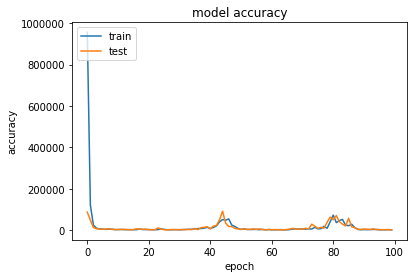

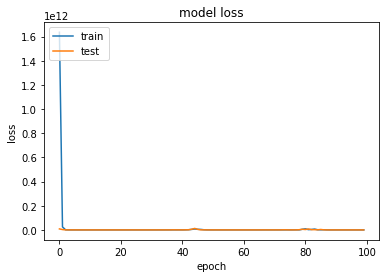

Test loss: 13253846.8
Test MAE: 1777.250732421875


In [212]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
loss,acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', loss)
print('Test MAE:', acc)

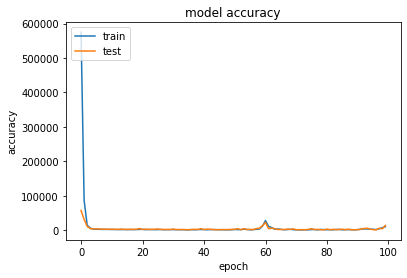

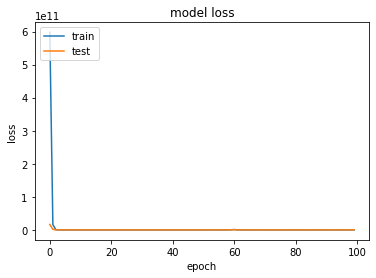

Test loss: 444781149.98651683
Test MAE: 13990.2490234375


In [181]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
loss,acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', loss)
print('Test MAE:', acc)